In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def compute_return(y, r_type="log", h=1):
    
    # exclude first h observations
    y2 = y[h:]
    # exclude last h observations
    y1 = y[:-h]
    
    if r_type == "log":
        ret = np.concatenate(([np.nan]*h, 100 * (np.log(y2) - np.log(y1))))
    else:
        ret = np.concatenate(([np.nan]*h, 100 * (y2-y1)/y1))
        
    return ret

In [3]:
import yfinance as yf

msft = yf.Ticker("^GDAXI")

In [4]:
hist = msft.history(start = '2022-12-30', end = '2024-02-15')

In [5]:
hist["ret1"] = compute_return(hist["Close"].values, h=1)

In [6]:
#1 submission round
T_0='2023-11-15'

due1_ret = hist[:T_0].drop(columns=["Open","High","Low","Close","Volume","Dividends","Stock Splits"])
#most recent 1mon ret1, 60 days captures a wider range for upper and lower bound 
last_t = 30
due1_ret1 = due1_ret[-last_t:]
due1_ret1

,ret1
Date,
2023-10-05 00:00:00+02:00,-0.196885
2023-10-06 00:00:00+02:00,1.053144
2023-10-09 00:00:00+02:00,-0.669741
2023-10-10 00:00:00+02:00,1.933896
2023-10-11 00:00:00+02:00,0.236309
2023-10-12 00:00:00+02:00,-0.226514
2023-10-13 00:00:00+02:00,-1.557411
2023-10-16 00:00:00+02:00,0.337425
2023-10-17 00:00:00+02:00,0.089868


In [7]:
#quantile levels
tau = [.025, .25, .5, .75, .975]

In [8]:
due1_ret1_baseline = np.zeros(5)

In [9]:
due1_ret1_baseline = np.quantile(due1_ret1, q=tau)

In [10]:
due1_ret1_baseline

array([-1.58389744, -0.32141427,  0.15410489,  0.70141394,  1.79374037])

In [11]:
due1_ret1_baseline_df = pd.DataFrame([due1_ret1_baseline], index=[T_0], columns=tau)
due1_ret1_baseline_df

,0.025,0.250,0.500,0.750,0.975
2023-11-15,-1.583897,-0.321414,0.154105,0.701414,1.79374


In [12]:
#2 submission round
T_0='2023-11-22'

due2_ret1 = hist[:T_0].drop(columns=["Open","High","Low","Close","Volume","Dividends","Stock Splits"])
#most recent 1mon ret1

due2_ret1 = due2_ret1[-30:]

due2_ret1_baseline = np.zeros(5)

due2_ret1_baseline = np.quantile(due2_ret1, q=tau)

due2_ret1_baseline_df = pd.DataFrame([due2_ret1_baseline], index=[T_0], columns=tau)
due2_ret1_baseline_df

,0.025,0.250,0.500,0.750,0.975
2023-11-22,-1.583897,-0.27914,0.154105,0.609971,1.541238


In [13]:
#3 submission round
T_0 = '2023-11-29'

due3_ret1 = hist.loc[:T_0].drop(columns=["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"])

# Select most recent 1 month of data
due3_ret1 = due3_ret1[-30:]

due3_ret1_baseline = np.zeros(5)
due3_ret1_baseline = np.quantile(due3_ret1, q=tau)

due3_ret1_baseline_df = pd.DataFrame([due3_ret1_baseline], index=[T_0], columns=tau)

due2_ret1_baseline_df

,0.025,0.250,0.500,0.750,0.975
2023-11-22,-1.583897,-0.27914,0.154105,0.609971,1.541238


In [14]:
#4 submission round
T_0 = '2023-12-06'

due4_ret1 = hist.loc[:T_0].drop(columns=["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"])

# Select most recent 1 month of data
due4_ret1 = due4_ret1[-30:]

due4_ret1_baseline = np.zeros(5)
due4_ret1_baseline = np.quantile(due4_ret1, q=tau)

due4_ret1_baseline_df = pd.DataFrame([due4_ret1_baseline], index=[T_0], columns=tau)

due4_ret1_baseline_df

,0.025,0.250,0.500,0.750,0.975
2023-12-06,-0.85927,0.060627,0.301754,0.774414,1.541238


In [15]:
#5 submission round
T_0 = '2023-12-13'

due5_ret1 = hist.loc[:T_0].drop(columns=["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"])

# Select most recent 1 month of data
due5_ret1 = due5_ret1[-30:]

due5_ret1_baseline = np.zeros(5)
due5_ret1_baseline = np.quantile(due5_ret1, q=tau)

due5_ret1_baseline_df = pd.DataFrame([due5_ret1_baseline], index=[T_0], columns=tau)

due5_ret1_baseline_df

,0.025,0.250,0.500,0.750,0.975
2023-12-13,-0.498504,0.007264,0.272397,0.779914,1.541238


In [16]:
#6 submission round
T_0 = '2023-12-20'

due6_ret1 = hist.loc[:T_0].drop(columns=["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"])

# Select most recent 1 month of data
due6_ret1 = due6_ret1[-30:]

due6_ret1_baseline = np.zeros(5)
due6_ret1_baseline = np.quantile(due6_ret1, q=tau)

due6_ret1_baseline_df = pd.DataFrame([due6_ret1_baseline], index=[T_0], columns=tau)

due6_ret1_baseline_df

,0.025,0.250,0.500,0.750,0.975
2023-12-20,-0.650419,-0.054901,0.224058,0.770308,1.288255


In [17]:
#7 submission round
T_0 = '2024-01-10'

due7_ret1 = hist.loc[:T_0].drop(columns=["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"])

# Select most recent 1 month of data
due7_ret1 = due7_ret1[-30:]

due7_ret1_baseline = np.zeros(5)
due7_ret1_baseline = np.quantile(due7_ret1, q=tau)

due7_ret1_baseline_df = pd.DataFrame([due7_ret1_baseline], index=[T_0], columns=tau)

due7_ret1_baseline_df

,0.025,0.250,0.500,0.750,0.975
2024-01-10,-0.819362,-0.149574,0.074931,0.432574,1.090641


In [18]:
#8 submission round
T_0 = '2024-01-17'

due8_ret1 = hist.loc[:T_0].drop(columns=["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"])

# Select most recent 1 month of data
due8_ret1 = due8_ret1[-30:]

due8_ret1_baseline = np.zeros(5)
due8_ret1_baseline = np.quantile(due8_ret1, q=tau)

due8_ret1_baseline_df = pd.DataFrame([due8_ret1_baseline], index=[T_0], columns=tau)

due8_ret1_baseline_df

,0.025,0.250,0.500,0.750,0.975
2024-01-17,-1.004303,-0.223813,-0.010369,0.278248,0.826142


In [19]:
#9 submission round
T_0 = '2024-01-24'

due9_ret1 = hist.loc[:T_0].drop(columns=["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"])

# Select most recent 1 month of data
due9_ret1 = due9_ret1[-30:]

due9_ret1_baseline = np.zeros(5)
due9_ret1_baseline = np.quantile(due9_ret1, q=tau)

due9_ret1_baseline_df = pd.DataFrame([due9_ret1_baseline], index=[T_0], columns=tau)

due9_ret1_baseline_df

,0.025,0.250,0.500,0.750,0.975
2024-01-24,-1.004303,-0.265383,-0.041939,0.278248,1.118253


In [20]:
#10 submission round
T_0 = '2024-01-31'

due10_ret1 = hist.loc[:T_0].drop(columns=["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"])

# Select most recent 1 month of data
due10_ret1 = due10_ret1[-30:]

due10_ret1_baseline = np.zeros(5)
due10_ret1_baseline = np.quantile(due10_ret1, q=tau)

due10_ret1_baseline_df = pd.DataFrame([due10_ret1_baseline], index=[T_0], columns=tau)

due10_ret1_baseline_df


,0.025,0.250,0.500,0.750,0.975
2024-01-31,-1.004303,-0.296658,-0.029584,0.316112,1.118253


In [21]:
#11 submission round
T_0 = '2024-02-07'

due11_ret1 = hist.loc[:T_0].drop(columns=["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"])

# Select most recent 1 month of data
due11_ret1 = due11_ret1[-30:]

due11_ret1_baseline = np.zeros(5)
due11_ret1_baseline = np.quantile(due11_ret1, q=tau)

due11_ret1_baseline_df = pd.DataFrame([due11_ret1_baseline], index=[T_0], columns=tau)

due11_ret1_baseline_df

,0.025,0.250,0.500,0.750,0.975
2024-02-07,-1.004303,-0.294618,-0.032542,0.34319,1.118253


In [22]:
#12 submission round
T_0 = '2024-02-14'

due12_ret1 = hist.loc[:T_0].drop(columns=["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"])

# Select most recent 1 month of data
due12_ret1 = due12_ret1[-30:]

due12_ret1_baseline = np.zeros(5)
due12_ret1_baseline = np.quantile(due12_ret1, q=tau)

due12_ret1_baseline_df = pd.DataFrame([due12_ret1_baseline], index=[T_0], columns=tau)

due12_ret1_baseline_df

,0.025,0.250,0.500,0.750,0.975
2024-02-14,-0.876711,-0.294618,-0.032542,0.452508,1.118253


In [23]:
FC_results_list = [due1_ret1_baseline_df, due2_ret1_baseline_df, due3_ret1_baseline_df, due4_ret1_baseline_df,
                  due5_ret1_baseline_df, due6_ret1_baseline_df, due7_ret1_baseline_df, due8_ret1_baseline_df, 
                   due9_ret1_baseline_df, due10_ret1_baseline_df, due11_ret1_baseline_df, due12_ret1_baseline_df]
FC_results_df = pd.concat(FC_results_list, axis=0)

In [24]:
FC_results_df

,0.025,0.250,0.500,0.750,0.975
2023-11-15,-1.583897,-0.321414,0.154105,0.701414,1.793740
2023-11-22,-1.583897,-0.279140,0.154105,0.609971,1.541238
2023-11-29,-1.243482,-0.085307,0.224058,0.701414,1.541238
2023-12-06,-0.859270,0.060627,0.301754,0.774414,1.541238
2023-12-13,-0.498504,0.007264,0.272397,0.779914,1.541238
2023-12-20,-0.650419,-0.054901,0.224058,0.770308,1.288255
2024-01-10,-0.819362,-0.149574,0.074931,0.432574,1.090641
2024-01-17,-1.004303,-0.223813,-0.010369,0.278248,0.826142
2024-01-24,-1.004303,-0.265383,-0.041939,0.278248,1.118253
2024-01-31,-1.004303,-0.296658,-0.029584,0.316112,1.118253


In [25]:
#forcasting evaluation

In [28]:
realized_data = msft.history(start='2022-12-30', end='2024-02-26')
realized_data["ret1"] = compute_return(realized_data["Close"].values, h=1)

realized_data = realized_data.drop(columns=["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"])


In [29]:
realized_T01 = realized_data.loc[['2023-11-16','2023-11-23','2023-11-30','2023-12-07','2023-12-14','2023-12-21',
                               '2024-01-11','2024-01-18','2024-01-25','2024-02-01','2024-02-08',
                               '2024-02-15']]
realized_T01

,ret1
Date,
2023-11-16 00:00:00+01:00,0.243797
2023-11-23 00:00:00+01:00,0.231031
2023-11-30 00:00:00+01:00,0.302512
2023-12-07 00:00:00+01:00,-0.164932
2023-12-14 00:00:00+01:00,-0.082464
2023-12-21 00:00:00+01:00,-0.273071
2024-01-11 00:00:00+01:00,-0.859180
2024-01-18 00:00:00+01:00,0.822211
2024-01-25 00:00:00+01:00,0.100601


In [30]:
def quantile_score(q_hat, y, tau):
    scores = []
    for i in range(len(tau)):
        if q_hat[i] > y:
            score = 2 * (1 - tau[i]) * (q_hat[i] - y)
        elif y >= q_hat[i]:
            score = 2 * tau[i] * (y - q_hat[i])
        else:
            score = 0
        scores.append(score)
    return scores

ret_1_scores = []


# Iterate over each submission day (row) in FC_results

for i in range(FC_results_df.shape[0]):
    q_hat = FC_results_df.iloc[i].values
    y = realized_T01.iloc[i].values
    scores = quantile_score(q_hat, y, tau)
    ret_1_scores.append(scores)
    
ret_1_scores

[[array([0.09138473]),
  array([0.28260571]),
  array([0.08969226]),
  array([0.22880839]),
  array([0.07749716])],
 [array([0.09074643]),
  array([0.25508571]),
  array([0.07692625]),
  array([0.18946991]),
  array([0.06551035])],
 [array([0.07729969]),
  array([0.19390972]),
  array([0.07845423]),
  array([0.19945099]),
  array([0.06193631])],
 [array([0.03471688]),
  array([0.33833906]),
  array([0.46668666]),
  array([0.46967323]),
  array([0.08530853])],
 [array([0.02080198]),
  array([0.1345921]),
  array([0.35486122]),
  array([0.43118905]),
  array([0.08118513])],
 [array([0.01886736]),
  array([0.32725583]),
  array([0.49712921]),
  array([0.52168983]),
  array([0.0780663])],
 [array([0.07764448]),
  array([1.06440962]),
  array([0.93411094]),
  array([0.64587697]),
  array([0.09749106])],
 [array([0.0913257]),
  array([0.52301239]),
  array([0.83257994]),
  array([0.81594521]),
  array([0.00019652])],
 [array([0.05524519]),
  array([0.18299182]),
  array([0.14254016]),
  arra

In [31]:
columns = ['due1', 'due2', 'due3', 'due4', 'due5', 'due6', 'due7', 'due8', 'due9', 'due10', 'due11', 'due12']
ret_1_scores_df = pd.DataFrame(ret_1_scores).T

In [32]:
ret_1_scores_df.columns = columns
ret_1_scores_df.index = tau

In [33]:
ret_1_scores_df

,due1,due2,due3,due4,due5,due6,due7,due8,due9,due10,due11,due12
0.025,[0.09138472965497368],[0.09074642932577714],[0.07729969196860464],[0.03471687634289178],[0.020801984542401675],[0.01886735544772411],[0.07764447951827157],[0.09132570278053564],[0.05524519233116565],[0.03696957240906884],[0.06257109997926258],[0.07360986238801193]
0.250,[0.2826057141150029],[0.25508571393888513],[0.19390971658084233],[0.3383390596291891],[0.13459209674211436],[0.3272558324738828],[1.0644096196910757],[0.5230123853726898],[0.18299181843894896],[0.015873351042339223],[0.2708685997132143],[0.4450518903323264]
0.500,[0.08969226102424344],[0.07692625444031265],[0.07845422893391074],[0.4666866619008836],[0.35486121638586],[0.4971292141640937],[0.9341109405769821],[0.8325799420583202],[0.14254016375545575],[0.23532752308321747],[0.279661215607252],[0.6280277968454762]
0.750,[0.22880839245738027],[0.18946991409549696],[0.1994509911303899],[0.46967323332165467],[0.4311890518352568],[0.5216898273156412],[0.6458769697515798],[0.8159452050020111],[0.0888233694930296],[0.29051171297789224],[0.04803522112202252],[0.21446616184879197]
0.975,[0.07749716081165087],[0.0655103538732487],[0.06193631341135312],[0.08530853012851664],[0.08118512791911497],[0.07806630215776725],[0.09749106195082632],[0.00019652249761724656],[0.050882573242835516],[0.06915819316493234],[0.04355666559473858],[0.026138336532827357]


In [34]:
ret_1_scores_df=ret_1_scores_df.astype(float)

Text(0, 0.5, 'Score')

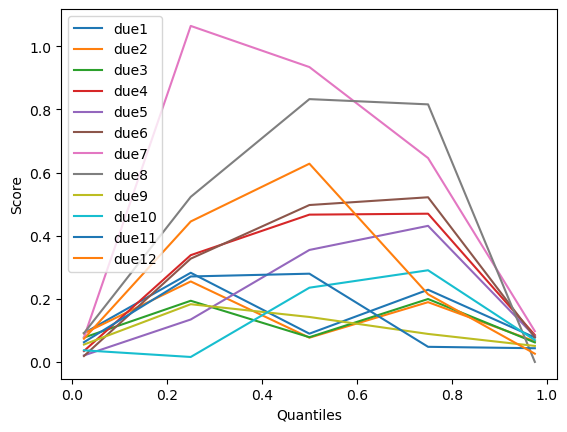

In [36]:
ret_1_scores_df.plot()
plt.xlabel('Quantiles')
plt.ylabel('Score')